In [88]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
data=pd.read_csv('/content/Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [90]:
data2=data.copy()

**EDA**

**Transformations**
creating target variable from taxable income and converting categorical columns into numerical using label encoding

Here risky is equal to 1 and good is given as 0

In [91]:
data['fraud_check']=np.where(data['Taxable.Income']<=30000,1,0)

In [92]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud_check
0,NO,Single,68833,50047,10,YES,0
1,YES,Divorced,33700,134075,18,YES,0
2,NO,Married,36925,160205,30,YES,0
3,YES,Single,50190,193264,15,YES,0
4,NO,Married,81002,27533,28,NO,0


Converting undergrad and urban to numerical values

In [93]:
data['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [94]:
data['Urban'].unique()

array(['YES', 'NO'], dtype=object)

In [95]:
data['Undergrad'].unique()

array(['NO', 'YES'], dtype=object)

In [96]:
data['Urban']=np.where(data['Urban']=='YES',1,0)
data['Undergrad']=np.where(data['Undergrad']=='YES',1,0)

In [97]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud_check
0,0,Single,68833,50047,10,1,0
1,1,Divorced,33700,134075,18,1,0
2,0,Married,36925,160205,30,1,0
3,1,Single,50190,193264,15,1,0
4,0,Married,81002,27533,28,0,0


Converting the marital status

In [98]:
def marital(X):
  if X=='Single':
    y=1
  elif X=='Divorced':
    y=2
  else:
    y=3
  return y

In [99]:
data['Marital.Status']=data['Marital.Status'].map(marital)

In [100]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud_check
0,0,1,68833,50047,10,1,0
1,1,2,33700,134075,18,1,0
2,0,3,36925,160205,30,1,0
3,1,1,50190,193264,15,1,0
4,0,3,81002,27533,28,0,0


Now we have the data set in the required format

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital.Status   600 non-null    int64
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int64
 6   fraud_check      600 non-null    int64
dtypes: int64(7)
memory usage: 32.9 KB


All the data types are in interger format ,There are 600 data's

In [102]:
data.describe()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud_check
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.961667,55208.375000,108747.368333,15.558333,0.503333,0.206667
std,0.500017,0.827449,26204.827597,49850.075134,8.842147,0.500406,0.405252
min,0.000000,1.000000,10003.000000,25779.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,32871.500000,66966.750000,8.000000,0.000000,0.000000
50%,1.000000,2.000000,55074.500000,106493.500000,15.000000,1.000000,0.000000
75%,1.000000,3.000000,78611.750000,150114.250000,24.000000,1.000000,0.000000
max,1.000000,3.000000,99619.000000,199778.000000,30.000000,1.000000,1.000000


This give different stats info like standard deviation ,mean values etc

**Visualization**

**Distribution plot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

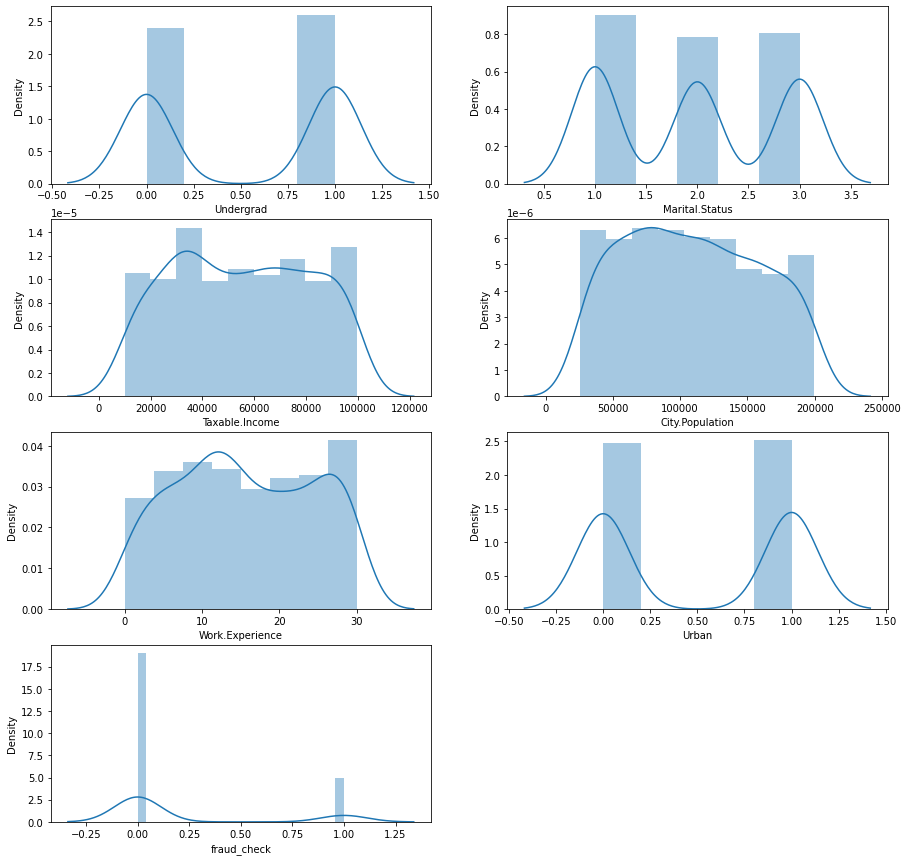

In [103]:
name=data.columns
plt.figure(figsize=(15,15))
for i in range(0,len(name)):
  plt.subplot(4,2,i+1)
  sns.distplot(data[name[i]])

Count plot 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


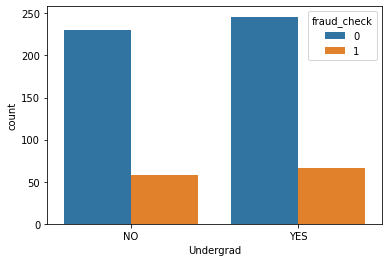

In [104]:
sns.countplot(data2['Undergrad'],hue='fraud_check',data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


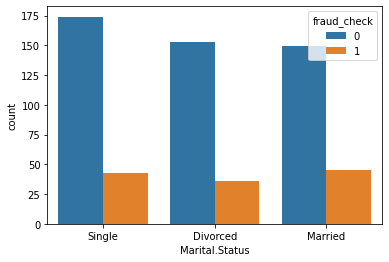

In [105]:
sns.countplot(data2['Marital.Status'],hue='fraud_check',data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


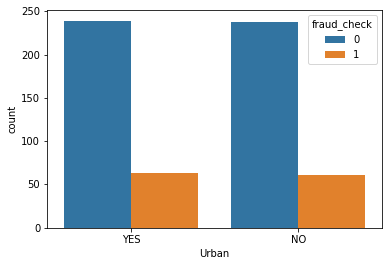

In [106]:
sns.countplot(data2['Urban'],hue='fraud_check',data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


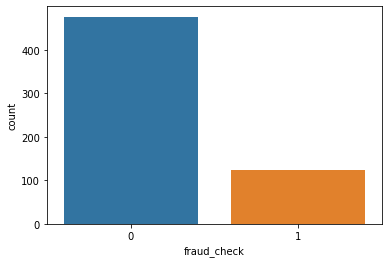

In [107]:
sns.countplot(data['fraud_check'])

These count plot gives an idea of where the risky transaction are taking place

**Missing values**

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital.Status   600 non-null    int64
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int64
 6   fraud_check      600 non-null    int64
dtypes: int64(7)
memory usage: 32.9 KB


In [109]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
fraud_check        0
dtype: int64

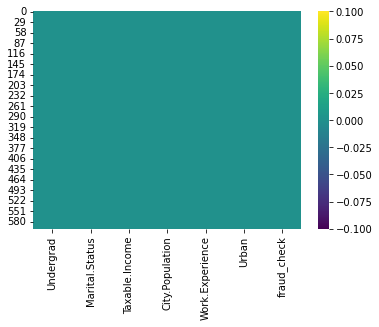

In [110]:
sns.heatmap(data.isnull(),cmap='viridis')

There is no missing values in this dataset

**Duplicate values**

In [111]:
data.duplicated().sum()

0

There is no duplicate values present in the dataset

**Correlations**

In [ ]:
sns.pairplot(data)

In [ ]:
data.corr()

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

Selecting the independet and dependent variable

In [ ]:
data.head()

In [ ]:
X=data.iloc[:,:6].values
y=data.iloc[:,6].values

In [ ]:
X

Outliers

In [ ]:
fig=plt.figure(figsize=(15,15))
name=data.columns
for i in range(0,len(name)):
  plt.subplot(3,4,i+1)
  sns.boxplot(data[name[i]])

There are not much outlier present in the data set

Feature scaling is not required in this model as random forest works on the basis of gini impurity 

**Building the model**

**using train test split method**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
num_trees=100
max_features=3
rfc=RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
rfc.fit(X_train,y_train)

In [ ]:
y_pred=rfc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
print(accuracy_score(y_test,y_pred))

In [ ]:
print(confusion_matrix(y_test,y_pred))

The accuracy of the model is 100 %

**Using Kfold validation**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold=KFold(n_splits=10,random_state=0,shuffle=True)
rfc2=RandomForestClassifier(n_estimators=100,max_features=3)
results=cross_val_score(rfc2,X,y,cv=kfold)
print(results)
print(results.mean())

Using kfold validation technique we are getting an accuracy of 99%

Let us try different model using grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
search={'n_estimators':[50,100,150,200,500,100],'max_features':[2,3,4,5,6],'max_depth':[3,4,5,6,7]}

In [ ]:
rfc3=RandomForestClassifier()
Gs=GridSearchCV(estimator=rfc3,param_grid=search,scoring='accuracy',cv=10)
Gs.fit(X,y)

In [ ]:
#best parameters
print(Gs.best_params_)

In [ ]:
print(Gs.best_score_)

In [ ]:
rfc4=RandomForestClassifier(n_estimators=50,max_features=2,max_depth=3)
rfc4.fit(X,y)

results=cross_val_score(rfc4,X,y,cv=10)
print(results)
print(results.mean())

Based on the model we can select the model with 100% accuracy